## **Data Preprocessing**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Handle Data Types:**

In [12]:
df[["show_id","type","title","rating","duration","listed_in"]] = df[["show_id","type","title","rating","duration","listed_in"]].astype("category")
df["release_year"] = df["release_year"].astype("int32")
df["date_added"] = pd.to_datetime(df["date_added"])

C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\770126559.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   category      
 1   type          8807 non-null   category      
 2   title         8807 non-null   category      
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   category      
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(6), datetime64[ns](1), int32(1), object(4)
memory usage: 1.1+ MB


In [14]:
df["country"] = df["country"].str.split(",")
df = df.explode("country")
df["country"] = df["country"].str.strip()

In [15]:
df["listed_in"] = df["listed_in"].str.split(",")
df = df.explode("listed_in")
df["listed_in"] = df["listed_in"].str.strip()

In [16]:
df["month"] = df["date_added"].dt.month
df["year"] = df["date_added"].dt.year

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9.0,2021.0


**Handle Missing Values:**

In [18]:
df.isna().sum()

show_id            0
type               0
title              0
director        6567
cast            1848
country         1722
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
month             20
year              20
dtype: int64

In [19]:
df.dropna(subset=["date_added","month","year","rating","duration"],inplace=True)
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
year            0
dtype: int64

**Handle Duplicates:**

In [21]:
df.duplicated().sum()

0

## **EDA**

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9.0,2021.0


In [23]:
df["listed_in"].value_counts().head(10)

listed_in
International Movies        3513
Dramas                      3201
Comedies                    1981
International TV Shows      1463
Action & Adventure          1182
Documentaries               1118
Independent Movies          1040
TV Dramas                    851
Children & Family Movies     845
Thrillers                    806
Name: count, dtype: int64

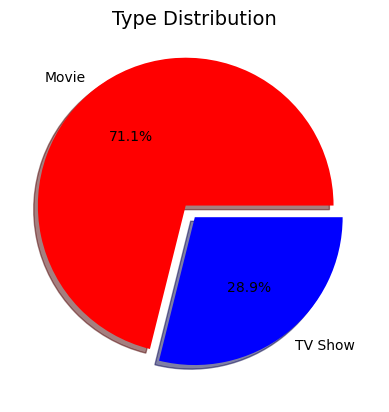

In [24]:
# percentage of each type
plt.pie(df["type"].value_counts(),labels=df["type"].value_counts().index,autopct="%1.1f%%",shadow=True,colors=["#ff0000","#0000ff"],explode=[0.1,0])
plt.title("Type Distribution",fontsize=14)
plt.show()

country
United States     6765
India             2804
United Kingdom    1780
Unknown           1720
France             916
Canada             877
Japan              729
South Korea        632
Spain              591
Germany            511
Name: count, dtype: int64


C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\412767295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\412767295.py:5: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(


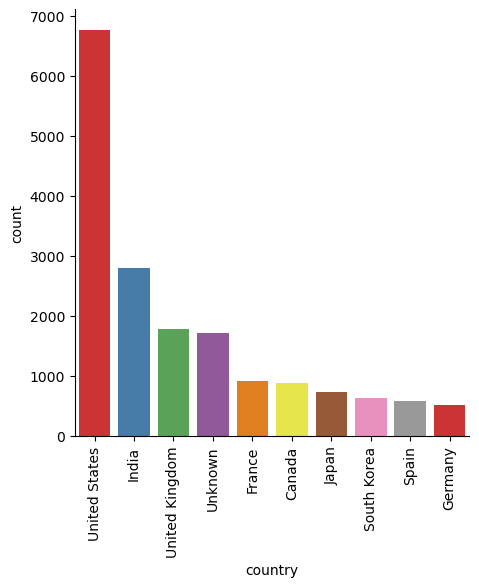

In [26]:
# top 10 countries
top_countries = df["country"].value_counts().head(10)

print(top_countries)
sns.catplot(
    x="country", 
    data=df[df["country"].isin(top_countries.index)],
    kind="count",
    order=top_countries.index, 
    palette=sns.color_palette("Set1")
)
plt.xticks(rotation=90)
plt.show()

director
Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
Olivier Assayas        30
Tom Hooper             30
Suhas Kadav            29
Don Michael Paul       29
Johnnie To             28
Name: count, dtype: int64


C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\553117392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\553117392.py:9: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(


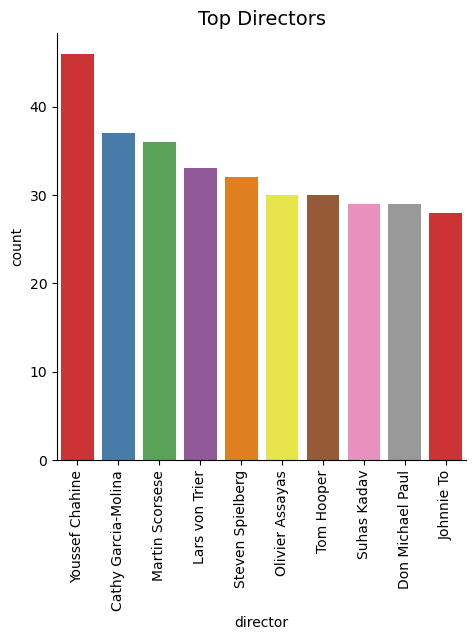

In [ ]:
top_directors = df["director"].value_counts().head(11)
top_directors = top_directors.drop("Unknown")
print(top_directors)

df_top_directors = df[df["director"].isin(top_directors.index)]

sns.catplot(
    x="director",
    data=df_top_directors,
    kind="count",
    order=top_directors.index,
    palette=sns.color_palette("Set1")
)

plt.title("Top Directors", fontsize=14)
plt.xticks(rotation=90)
plt.show()
plt.show()

release_year
2018    3079
2017    2667
2019    2632
2016    2483
2020    2312
        ... 
1966       3
1946       3
1959       2
1947       2
1925       1
Name: count, Length: 74, dtype: int64


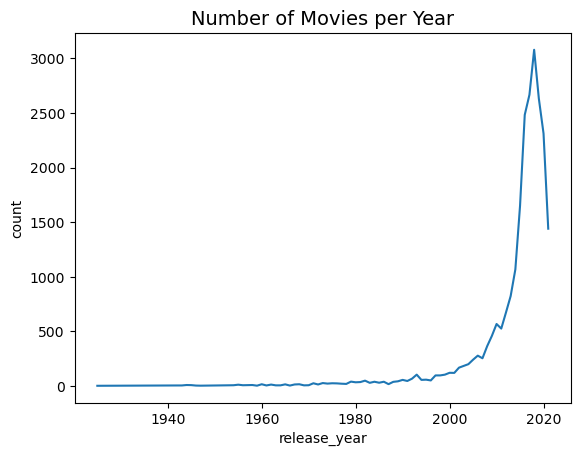

In [29]:
# number of movies released per year
data = df["release_year"].value_counts()
print(data)
sns.lineplot(x=data.index, y=data, data=pd.DataFrame(data))
plt.title("Number of Movies per Year",fontsize=14)
plt.show()

month
7.0     2246
12.0    2190
1.0     2094
4.0     2083
9.0     2072
10.0    2056
8.0     2026
6.0     1970
3.0     1964
11.0    1842
Name: count, dtype: int64


C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\592129730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\592129730.py:7: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(


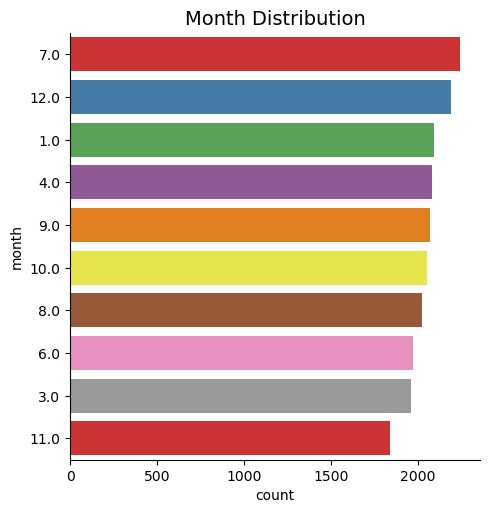

In [31]:
# top 10 months of adding of movies
month = df["month"].value_counts().head(10)
print(month)

df_top_months = df[df["month"].isin(month.index)]

sns.catplot(
    y="month", 
    data=df_top_months, 
    kind="count", 
    order=month.index, 
    palette=sns.color_palette("Set1")
)

plt.title("Month Distribution", fontsize=14)
plt.show()

duration
1 Season     4624
2 Seasons    1074
3 Seasons     521
93 min        441
96 min        425
97 min        416
94 min        401
90 min        400
95 min        396
91 min        372
Name: count, dtype: int64


C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\2853328326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
C:\Users\eslam\AppData\Local\Temp\ipykernel_22256\2853328326.py:7: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(


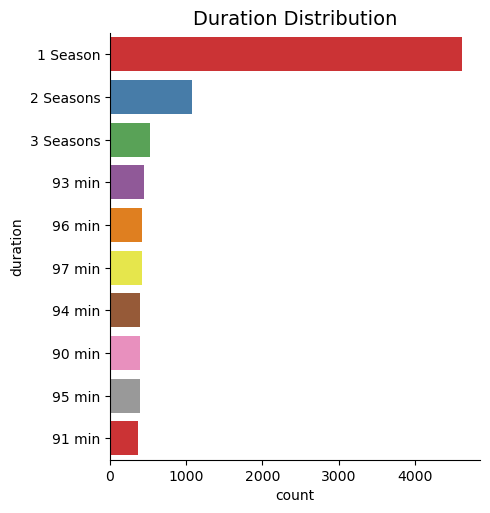

In [33]:
# top 10 durations of movies
duration = df["duration"].value_counts().head(10)
print(duration)

df_top_duration = df[df["duration"].isin(duration.index)]

sns.catplot(
    y="duration", 
    data=df_top_duration, 
    kind="count", 
    order=duration.index, 
    palette=sns.color_palette("Set1")
)

plt.title("Duration Distribution", fontsize=14)
plt.show()